# 타이타닉 생존자 예측하기

## 1.데이터 일고 전체적인 상황 확인하기

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install xlrd

raw_data = pd.read_excel('../../data/titanic.xls')
raw_data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.2 MB/s eta 0:00:00


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 변수 설명
* pclass : 1, 2, 3등석
* survived : 생존 여부. survived(생존-1), dead(사망-0)
* name : 이름
* sex :
* 성별 : female(여성), male(남성)
* age : 나이
* sibsp : 함께 탑승한 형제 또는 배우자의 수
* parch : 함께 탑승한 부모 또는 자녀의 수
* ticket : 티켓 번호
* fare : 티켓 요금
* cabin : 선실 번호
* embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
* boat : 탈출한 보트가 있다면 boat 번호

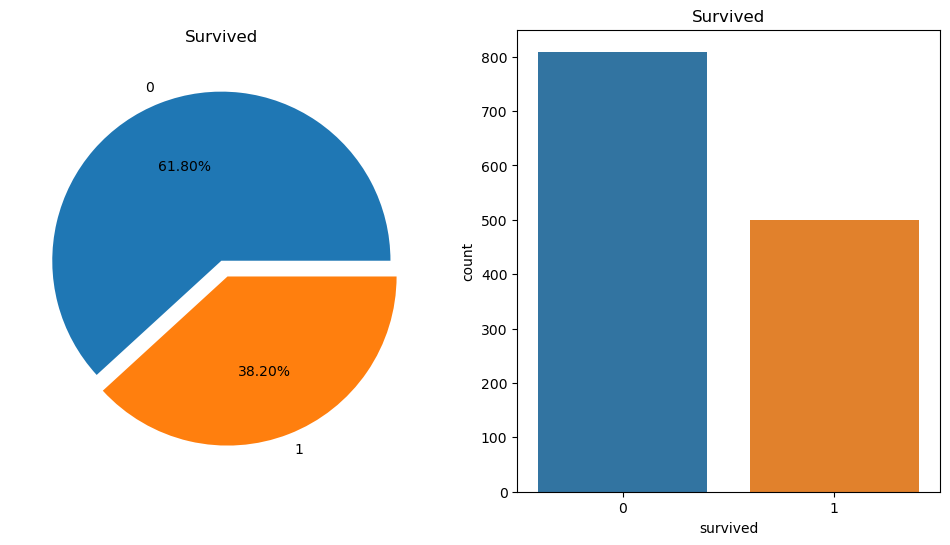

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1]
                                             , autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot( data=raw_data, x= 'survived',ax=ax[1])
ax[1].set_title('Survived')
plt.show()
# 생존율 : 38.2%, 대략 500명

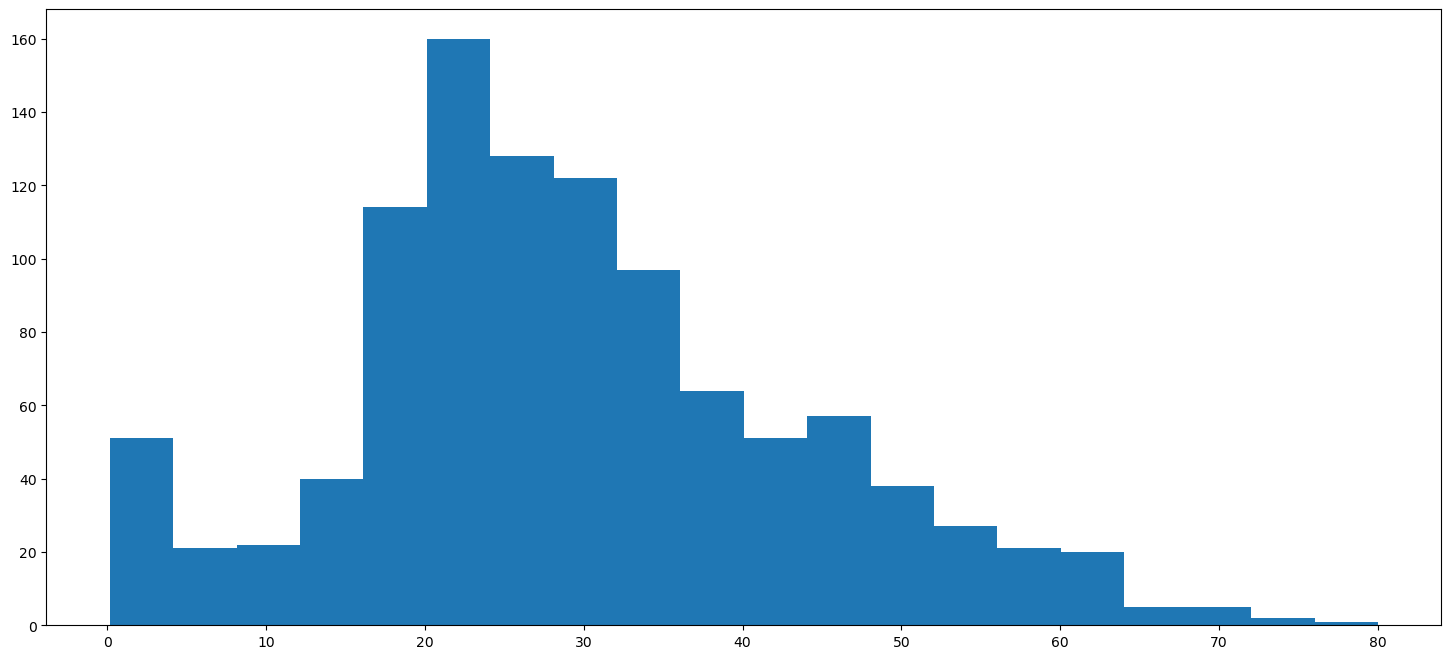

In [8]:
# 0-4세 아기들 많음
raw_data['age'].hist(bins=20, figsize=(18,8),grid=False);

In [9]:
# 1등석 생존율이 가장 높고 연령도 많다. 요금차이가 많이 난다. 
raw_data.groupby('pclass').mean()

/tmp/ipykernel_21327/993069790.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_data.groupby('pclass').mean()


,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [10]:
raw_data.corr()

/tmp/ipykernel_21327/2464266106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


/tmp/ipykernel_21327/16736789.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,


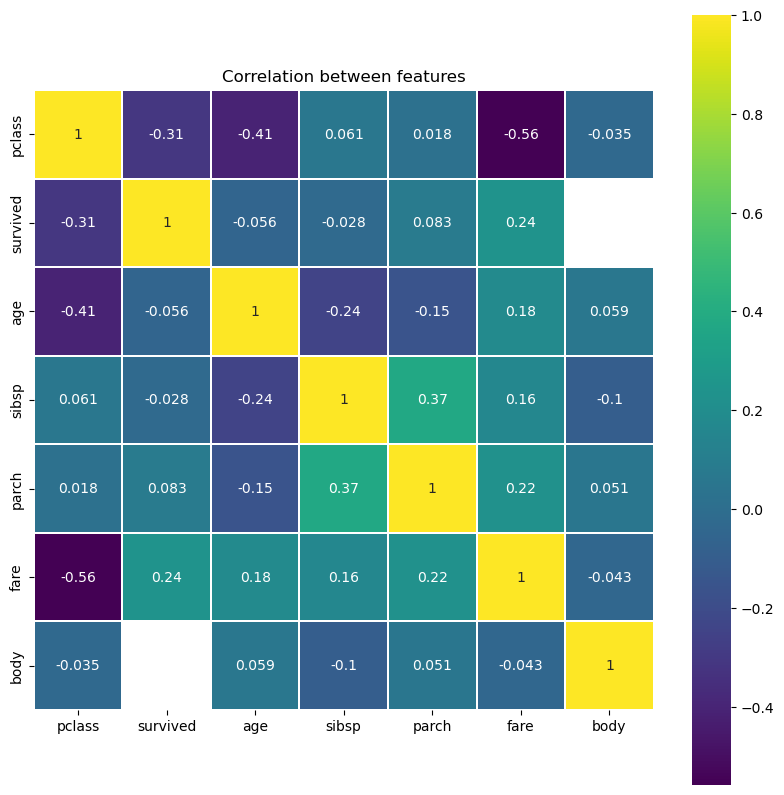

In [11]:
# 상관계수는 두 데이터의 상관관계만 확인 인과관계로 생각하면 안됩니다.
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## 나이구간별 및 성별 및 생존률 확인하기

In [13]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins=[0, 3, 7, 15, 30, 60, 100],
                             include_lowest=True,
                             labels=['baby', 'children', 'teenage',
                                     'young', 'adult', 'old'])
raw_data.head(20)
raw_data.to_excel(excel_writer='titanic_age.xlsx')

In [15]:
# baby가 3등실에 많이 탐
raw_data.groupby('age_cat').mean()

/tmp/ipykernel_21327/3011118058.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_data.groupby('age_cat').mean()


,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


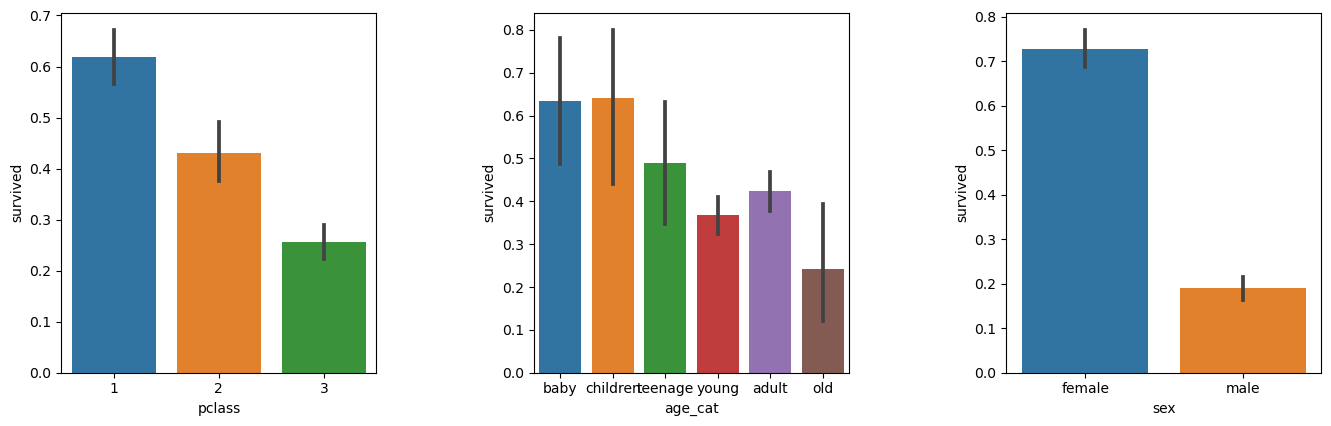

In [16]:
# 1등실의 생존율이 높고 나이가 적은 아이들의 생존율이 높다.
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot(data=raw_data, x='pclass', y='survived')

plt.subplot(132)
sns.barplot(data=raw_data, x='age_cat', y='survived')

plt.subplot(133)
sns.barplot(data=raw_data, x='sex', y='survived')

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

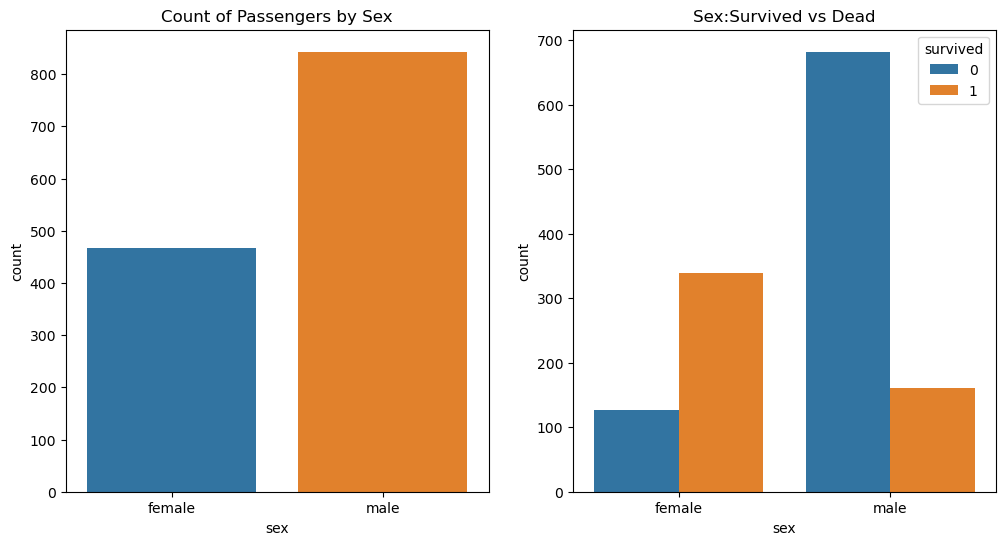

In [17]:
# 성별로 탑승인원 확인 (여성450명탑승(350명 생존), 남성850명탑승(170명 생존))
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=raw_data, x='sex', ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(data=raw_data, x='sex', hue='survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## 보트 탑승 승객의 생존률 확인하기

In [18]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
